# Group 6
- Sukhvir Singh
- Rich Chau
- Tyler Tran
- Roopesha Rai

Data analysis, visualization, preprocessing, and modeling of the Zillow Housing dataset.

In [1]:
# this is needed to connect the notebook to the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

## Load 2016 data

### train 2016

In [3]:
train_df = pd.read_csv('/content/drive/My Drive/CMPE 255 Project/zillow-prize-1/train_2016_v2.csv', parse_dates=['transactiondate'])

In [4]:
train_df.shape

(90275, 3)

In [5]:
train_df.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


Text(0.5, 1.0, 'Logerror vs Index')

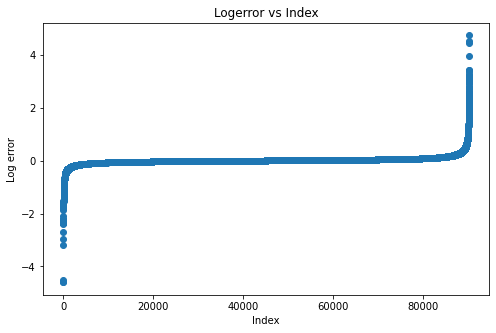

In [6]:
plt.figure(figsize=(8,5))
plt.xlabel('Index')
plt.ylabel('Log error')
plt.scatter(range(train_df.shape[0]), np.sort(train_df['logerror'].values))
plt.title('Logerror vs Index')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


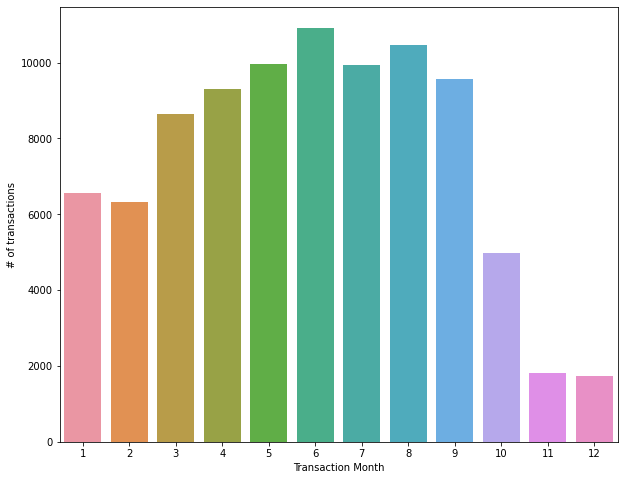

In [7]:
# show transactions for each month of the year
train_df['transaction_month'] = train_df['transactiondate'].dt.month
months = train_df['transaction_month'].value_counts()
plt.figure(figsize=(10,8))
sns.barplot(months.index, months.values)
plt.xlabel('Transaction Month')
plt.ylabel('# of transactions')
plt.show()

### properties 2016

In [8]:
properties_df = pd.read_csv('/content/drive/My Drive/CMPE 255 Project/zillow-prize-1/properties_2016.csv')
properties_df.shape

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (22,32,34,49,55) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(2985217, 58)

In [10]:
properties_df.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34144442.0,-118654084.0,85768.0,NaN,NaN,NaN,NaN,NaN,010D,269.0,NaN,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34140430.0,-118625364.0,4083.0,NaN,NaN,NaN,NaN,NaN,0109,261.0,LCA11*,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,73026.0,NaN,NaN,73026.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,33989359.0,-118394633.0,63085.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037703e+07,51617.0,3101.0,NaN,96095.0,0.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,NaN,5068.0,NaN,NaN,5068.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34148863.0,-118437206.0,7521.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037141e+07,12447.0,3101.0,27080.0,96424.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1948.0,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,NaN,1776.0,NaN,NaN,1776.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34194168.0,-118385816.0,8512.0,NaN,NaN,NaN,NaN,NaN,1210,31.0,LAM1,6.037123e+07,12447.0,3101.0,46795.0,96450.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1947.0,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [11]:
properties_df.isna().sum()

parcelid                              0
airconditioningtypeid           2173698
architecturalstyletypeid        2979156
basementsqft                    2983589
bathroomcnt                       11462
bedroomcnt                        11450
buildingclasstypeid             2972588
buildingqualitytypeid           1046729
calculatedbathnbr                128912
decktypeid                      2968121
finishedfloor1squarefeet        2782500
calculatedfinishedsquarefeet      55565
finishedsquarefeet12             276033
finishedsquarefeet13            2977545
finishedsquarefeet15            2794419
finishedsquarefeet50            2782500
finishedsquarefeet6             2963216
fips                              11437
fireplacecnt                    2672580
fullbathcnt                      128912
garagecarcnt                    2101950
garagetotalsqft                 2101950
hashottuborspa                  2916203
heatingorsystemtypeid           1178816
latitude                          11437


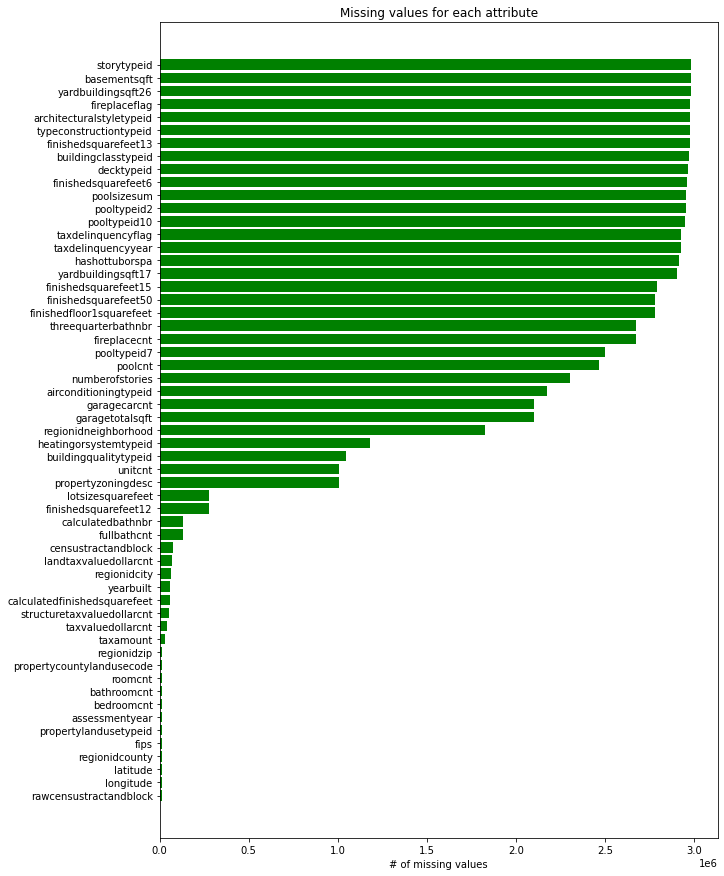

In [12]:
# visualize the missing values for each attribute
missing_df = properties_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count'] > 0]
missing_df = missing_df.sort_values(by='missing_count')

index = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(10,15))
rectangles = ax.barh(index, missing_df.missing_count.values, color='green')
ax.set_yticks(index)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel('# of missing values')
ax.set_title('Missing values for each attribute')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2015: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

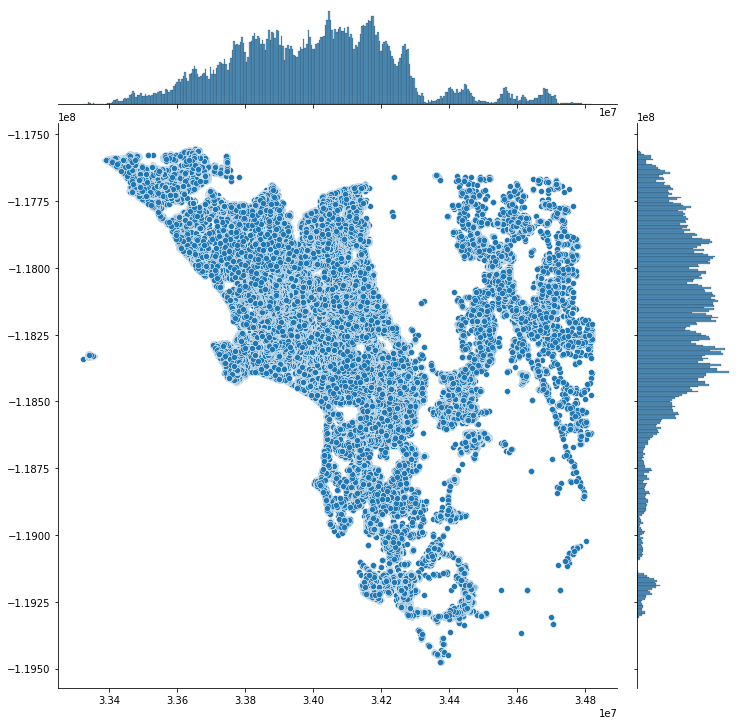

In [13]:
# the data comes with latitude and longitude that can be visualized
plt.figure(figsize=(10,10))
sns.jointplot(x=properties_df['latitude'].values, y=properties_df['longitude'].values, size=10)
plt.ylabel('Longitude')
plt.xlabel('Latitude')
plt.show()

It is important to note that all of the data is from 3 California counties: Los Angeles, Ventura, and Orange

![title](https://ca.ccw-permits.com/images/CA-CCW-County.jpg)

### combine train and properties datasets

In [14]:
train_df = pd.merge(train_df, properties_df, on='parcelid', how='left')
train_df.head()

,parcelid,logerror,transactiondate,transaction_month,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1,1.0,NaN,NaN,2.0,3.0,NaN,4.0,2.0,NaN,NaN,1684.0,1684.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34280990.0,-118488536.0,7528.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,LARS,6.037107e+07,12447.0,3101.0,31817.0,96370.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1959.0,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,1,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,NaN,NaN,2263.0,2263.0,NaN,NaN,NaN,NaN,6059.0,NaN,3.0,2.0,468.0,NaN,NaN,33668120.0,-117677556.0,3643.0,NaN,NaN,NaN,NaN,NaN,1,261.0,NaN,6.059052e+07,32380.0,1286.0,NaN,96962.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,2014.0,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1,1.0,NaN,NaN,3.0,2.0,NaN,4.0,3.0,NaN,NaN,2217.0,2217.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,2.0,34136312.0,-118175032.0,11423.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,PSR6,6.037464e+07,47019.0,3101.0,275411.0,96293.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1940.0,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1,1.0,NaN,NaN,2.0,2.0,NaN,4.0,2.0,NaN,NaN,839.0,839.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,33755800.0,-118309000.0,70859.0,NaN,NaN,NaN,NaN,NaN,010C,266.0,LAR3,6.037296e+07,12447.0,3101.0,54300.0,96222.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1987.0,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,1,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,NaN,NaN,2283.0,2283.0,NaN,NaN,NaN,NaN,6059.0,NaN,2.0,2.0,598.0,NaN,NaN,33485643.0,-117700234.0,6000.0,1.0,NaN,NaN,NaN,1.0,122,261.0,NaN,6.059042e+07,17686.0,1286.0,NaN,96961.0,8.0,NaN,1.0,NaN,NaN,NaN,NaN,1981.0,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


In [15]:
train_df.shape

(90275, 61)

In [16]:
pd.options.display.max_rows = 70
train_df.dtypes

parcelid                                 int64
logerror                               float64
transactiondate                 datetime64[ns]
transaction_month                        int64
airconditioningtypeid                  float64
architecturalstyletypeid               float64
basementsqft                           float64
bathroomcnt                            float64
bedroomcnt                             float64
buildingclasstypeid                    float64
buildingqualitytypeid                  float64
calculatedbathnbr                      float64
decktypeid                             float64
finishedfloor1squarefeet               float64
calculatedfinishedsquarefeet           float64
finishedsquarefeet12                   float64
finishedsquarefeet13                   float64
finishedsquarefeet15                   float64
finishedsquarefeet50                   float64
finishedsquarefeet6                    float64
fips                                   float64
fireplacecnt 

In [17]:
dtype_df = train_df.dtypes.reset_index()
dtype_df.columns = ["Attribute", "Data type"]
dtype_df

,Attribute,Data type
0,parcelid,int64
1,logerror,float64
2,transactiondate,datetime64[ns]
3,transaction_month,int64
4,airconditioningtypeid,float64
5,architecturalstyletypeid,float64
6,basementsqft,float64
7,bathroomcnt,float64
8,bedroomcnt,float64
9,buildingclasstypeid,float64


In [18]:
dtype_df.groupby('Data type').aggregate('count').reset_index()

,Data type,Attribute
0,int64,2
1,float64,53
2,datetime64[ns],1
3,object,5


### missing data

In [19]:
# get missing data from combined dataset
missing_df = train_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / train_df.shape[0]

In [20]:
# show cols with over 90% missing data
missing_df.loc[missing_df['missing_ratio'] > 0.9]

,column_name,missing_count,missing_ratio
5,architecturalstyletypeid,90014,0.997109
6,basementsqft,90232,0.999524
9,buildingclasstypeid,90259,0.999823
12,decktypeid,89617,0.992711
13,finishedfloor1squarefeet,83419,0.924054
16,finishedsquarefeet13,90242,0.999634
17,finishedsquarefeet15,86711,0.960521
18,finishedsquarefeet50,83419,0.924054
19,finishedsquarefeet6,89854,0.995336
25,hashottuborspa,87910,0.973802


In [21]:
missing_df.loc[missing_df['missing_ratio'] > 0.99]

,column_name,missing_count,missing_ratio
5,architecturalstyletypeid,90014,0.997109
6,basementsqft,90232,0.999524
9,buildingclasstypeid,90259,0.999823
12,decktypeid,89617,0.992711
16,finishedsquarefeet13,90242,0.999634
19,finishedsquarefeet6,89854,0.995336
44,storytypeid,90232,0.999524
46,typeconstructiontypeid,89976,0.996688
49,yardbuildingsqft26,90180,0.998948
52,fireplaceflag,90053,0.997541


In [22]:
train_df_new = missing_df.loc[missing_df['missing_ratio'] > 0.99]

In [23]:
train_df_new.isna().sum()

column_name      0
missing_count    0
missing_ratio    0
dtype: int64

In [24]:
# mean_values = train_df.mean(axis=0)
mean_values = train_df.median(axis=0)
train_df_new = train_df.fillna(mean_values)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


In [25]:
# get correlations of each attribute

x_cols = [col for col in train_df_new.columns if col not in ['logerror'] if train_df_new[col].dtype=='float64']

labels = []
vals = []

for col in x_cols:
  labels.append(col)
  vals.append(np.corrcoef(train_df_new[col].values, train_df_new['logerror'].values)[0,1])

corr_df = pd.DataFrame({
    'col_labels':labels,
    'corr_values': vals
})
corr_df = corr_df.sort_values(by='corr_values')

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


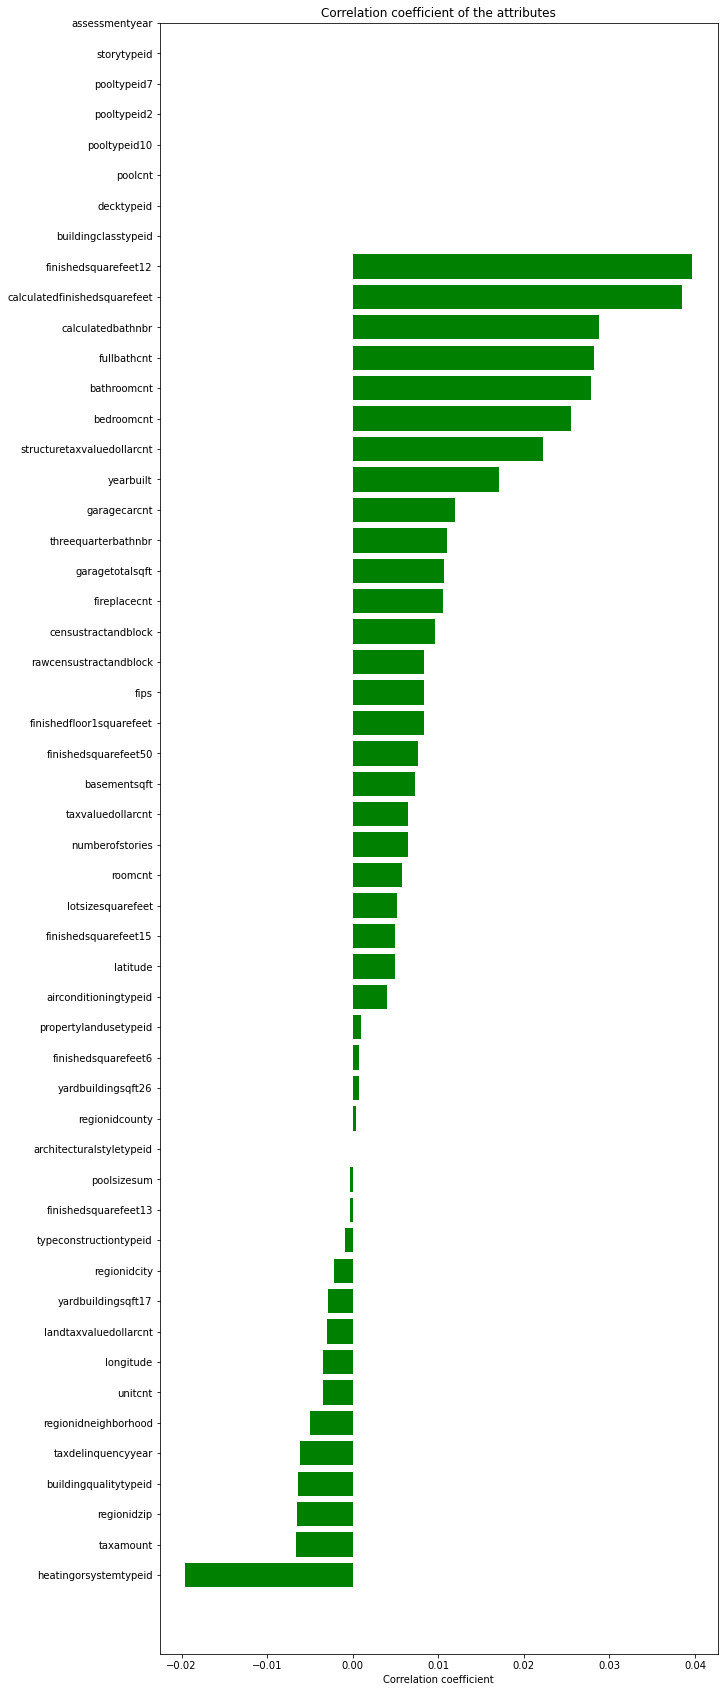

In [26]:
index = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(10,30))
rectangles = ax.barh(index, np.array(corr_df.corr_values.values), color='green')
ax.set_yticks(index)
ax.set_yticklabels(corr_df.col_labels.values, rotation='horizontal')
ax.set_xlabel('Correlation coefficient')
ax.set_title('Correlation coefficient of the attributes')
plt.show()

In [27]:
# the attributes that dont have a corr only have 1 unique value
corr_zero_cols = ['assessmentyear', 'storytypeid', 'pooltypeid2', 'pooltypeid7', 'pooltypeid10', 'poolcnt', 'decktypeid', 'buildingclasstypeid']
for col in corr_zero_cols:
    print(col, len(train_df_new[col].unique()))

assessmentyear 1
storytypeid 1
pooltypeid2 1
pooltypeid7 1
pooltypeid10 1
poolcnt 1
decktypeid 1
buildingclasstypeid 1


In [28]:
# high correlation attributes
corr_df_sel = corr_df.loc[(corr_df['corr_values'] > 0.02) | (corr_df['corr_values'] < -0.01)]
corr_df_sel

,col_labels,corr_values
21,heatingorsystemtypeid,-0.019586
45,structuretaxvaluedollarcnt,0.022264
4,bedroomcnt,0.025467
3,bathroomcnt,0.027889
18,fullbathcnt,0.028197
7,calculatedbathnbr,0.028788
10,calculatedfinishedsquarefeet,0.038488
11,finishedsquarefeet12,0.039694


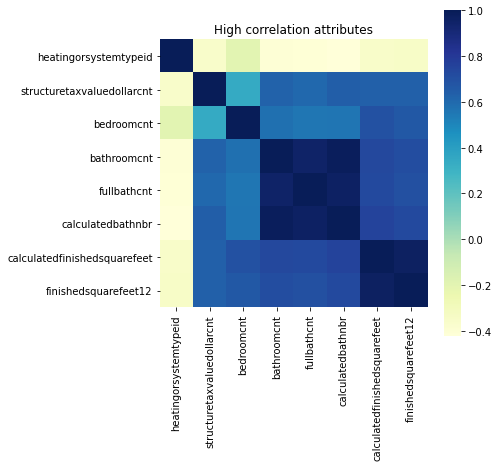

In [29]:
# heatmap of attribute correlations
cols_to_use = corr_df_sel['col_labels'].tolist()
temp_df = train_df_new[cols_to_use]
corr_matrix = temp_df.corr(method='spearman')

fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(corr_matrix, vmax=1, square=True, cmap="YlGnBu")
plt.title('High correlation attributes')
plt.show()

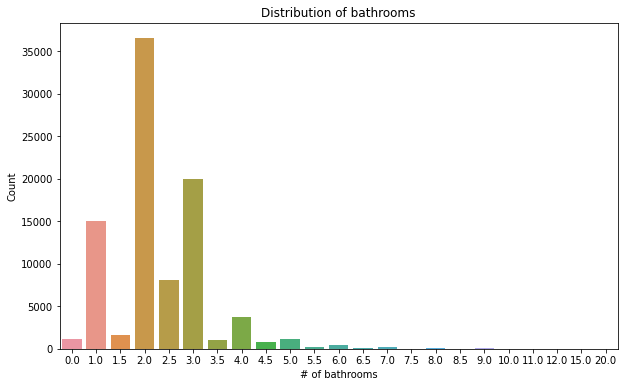

In [30]:
# distribution of the number of bathrooms
plt.figure(figsize=(10,6))
sns.countplot(x='bathroomcnt', data=train_df_new)
plt.xlabel('# of bathrooms')
plt.ylabel('Count')
plt.title('Distribution of bathrooms')
plt.show()

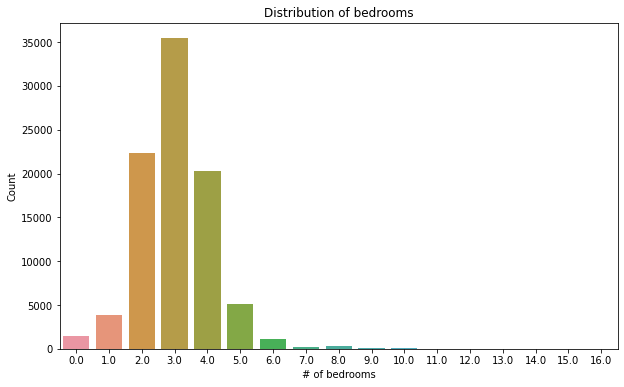

In [31]:
# distribution of the number of bedrooms
plt.figure(figsize=(10,6))
sns.countplot(x='bedroomcnt', data=train_df_new)
plt.xlabel('# of bedrooms')
plt.ylabel('Count')
plt.title('Distribution of bedrooms')
plt.show()

In [32]:
train_df_new.head()

,parcelid,logerror,transactiondate,transaction_month,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1,1.0,7.0,616.0,2.0,3.0,4.0,4.0,2.0,66.0,1244.0,1684.0,1684.0,1440.0,2104.5,1248.0,2028.0,6037.0,1.0,2.0,2.0,433.0,1,2.0,34280990.0,-118488536.0,7528.0,1.0,500.0,1.0,1.0,1.0,0100,261.0,LARS,6.037107e+07,12447.0,3101.0,31817.0,96370.0,0.0,7.0,1.0,6.0,1.0,259.5,159.0,1959.0,1.0,1,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,14.0,6.037107e+13
1,14366692,-0.1684,2016-01-01,1,1.0,7.0,616.0,3.5,4.0,4.0,7.0,3.5,66.0,1244.0,2263.0,2263.0,1440.0,2104.5,1248.0,2028.0,6059.0,1.0,3.0,2.0,468.0,1,2.0,33668120.0,-117677556.0,3643.0,1.0,500.0,1.0,1.0,1.0,1,261.0,NaN,6.059052e+07,32380.0,1286.0,118887.0,96962.0,0.0,7.0,1.0,6.0,1.0,259.5,159.0,2014.0,1.0,1,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,14.0,6.037615e+13
2,12098116,-0.0040,2016-01-01,1,1.0,7.0,616.0,3.0,2.0,4.0,4.0,3.0,66.0,1244.0,2217.0,2217.0,1440.0,2104.5,1248.0,2028.0,6037.0,1.0,3.0,2.0,433.0,1,2.0,34136312.0,-118175032.0,11423.0,1.0,500.0,1.0,1.0,1.0,0100,261.0,PSR6,6.037464e+07,47019.0,3101.0,275411.0,96293.0,0.0,7.0,1.0,6.0,1.0,259.5,159.0,1940.0,1.0,1,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,14.0,6.037464e+13
3,12643413,0.0218,2016-01-02,1,1.0,7.0,616.0,2.0,2.0,4.0,4.0,2.0,66.0,1244.0,839.0,839.0,1440.0,2104.5,1248.0,2028.0,6037.0,1.0,2.0,2.0,433.0,1,2.0,33755800.0,-118309000.0,70859.0,1.0,500.0,1.0,1.0,1.0,010C,266.0,LAR3,6.037296e+07,12447.0,3101.0,54300.0,96222.0,0.0,7.0,1.0,6.0,1.0,259.5,159.0,1987.0,1.0,1,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,14.0,6.037296e+13
4,14432541,-0.0050,2016-01-02,1,1.0,7.0,616.0,2.5,4.0,4.0,7.0,2.5,66.0,1244.0,2283.0,2283.0,1440.0,2104.5,1248.0,2028.0,6059.0,1.0,2.0,2.0,598.0,1,2.0,33485643.0,-117700234.0,6000.0,1.0,500.0,1.0,1.0,1.0,122,261.0,NaN,6.059042e+07,17686.0,1286.0,118887.0,96961.0,8.0,7.0,1.0,6.0,1.0,259.5,159.0,1981.0,2.0,1,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,14.0,6.059042e+13


In [33]:
train_df_new.dtypes

parcelid                                 int64
logerror                               float64
transactiondate                 datetime64[ns]
transaction_month                        int64
airconditioningtypeid                  float64
architecturalstyletypeid               float64
basementsqft                           float64
bathroomcnt                            float64
bedroomcnt                             float64
buildingclasstypeid                    float64
buildingqualitytypeid                  float64
calculatedbathnbr                      float64
decktypeid                             float64
finishedfloor1squarefeet               float64
calculatedfinishedsquarefeet           float64
finishedsquarefeet12                   float64
finishedsquarefeet13                   float64
finishedsquarefeet15                   float64
finishedsquarefeet50                   float64
finishedsquarefeet6                    float64
fips                                   float64
fireplacecnt 

In [34]:
train_df_new[['taxamount','landtaxvaluedollarcnt']].head()

,taxamount,landtaxvaluedollarcnt
0,6735.88,237416.0
1,10153.02,239071.0
2,11484.48,57912.0
3,3048.74,73362.0
4,5488.96,264977.0


In [35]:
train_df_new.mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


parcelid                        1.298466e+07
logerror                        1.145722e-02
transaction_month               5.849848e+00
airconditioningtypeid           1.260271e+00
architecturalstyletypeid        7.000665e+00
basementsqft                    6.160465e+02
bathroomcnt                     2.279474e+00
bedroomcnt                      3.031869e+00
buildingclasstypeid             4.000000e+00
buildingqualitytypeid           6.088408e+00
calculatedbathnbr               2.305168e+00
decktypeid                      6.600000e+01
finishedfloor1squarefeet        1.251896e+03
calculatedfinishedsquarefeet    1.771479e+03
finishedsquarefeet12            1.733665e+03
finishedsquarefeet13            1.439987e+03
finishedsquarefeet15            2.115380e+03
finishedsquarefeet50            1.256168e+03
finishedsquarefeet6             2.029280e+03
fips                            6.048871e+03
fireplacecnt                    1.019994e+00
fullbathcnt                     2.238073e+00
garagecarc

### normalize data

In [36]:
# we're only using these attributes because they're the most common ones
features_to_include = [
                       'bathroomcnt',
                       'bedroomcnt',
                       'calculatedfinishedsquarefeet',
                       'latitude',
                       'longitude',
                       'numberofstories',
                       'roomcnt',
                       'yearbuilt',
                       'landtaxvaluedollarcnt',
]
X = train_df_new[features_to_include]
y = train_df_new['taxvaluedollarcnt']
X.shape, y.shape

((90275, 9), (90275,))

In [37]:
X.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,numberofstories,roomcnt,yearbuilt,landtaxvaluedollarcnt
0,2.0,3.0,1684.0,34280990.0,-118488536.0,1.0,0.0,1959.0,237416.0
1,3.5,4.0,2263.0,33668120.0,-117677556.0,1.0,0.0,2014.0,239071.0
2,3.0,2.0,2217.0,34136312.0,-118175032.0,1.0,0.0,1940.0,57912.0
3,2.0,2.0,839.0,33755800.0,-118309000.0,1.0,0.0,1987.0,73362.0
4,2.5,4.0,2283.0,33485643.0,-117700234.0,2.0,8.0,1981.0,264977.0


In [38]:
# the longitude and latitude are on the wrong scale (need to be normalized to real scale)
X['latitude'] = X['latitude'] / 1000000
X['longitude'] = X['longitude'] / 1000000

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [39]:
X.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,numberofstories,roomcnt,yearbuilt,landtaxvaluedollarcnt
0,2.0,3.0,1684.0,34.280990,-118.488536,1.0,0.0,1959.0,237416.0
1,3.5,4.0,2263.0,33.668120,-117.677556,1.0,0.0,2014.0,239071.0
2,3.0,2.0,2217.0,34.136312,-118.175032,1.0,0.0,1940.0,57912.0
3,2.0,2.0,839.0,33.755800,-118.309000,1.0,0.0,1987.0,73362.0
4,2.5,4.0,2283.0,33.485643,-117.700234,2.0,8.0,1981.0,264977.0


In [40]:
X.mean()

bathroomcnt                          2.279474
bedroomcnt                           3.031869
calculatedfinishedsquarefeet      1771.478582
latitude                            34.005411
longitude                         -118.198868
numberofstories                      1.100426
roomcnt                              1.478516
yearbuilt                         1968.545156
landtaxvaluedollarcnt           278334.379407
dtype: float64

In [41]:
y.mean()

457671.3556798671

In [42]:
# normalize using standard scaler
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X[features_to_include] = sc.fit_transform(X[features_to_include])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3076: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.iloc._setitem_with_indexer((slice(None), indexer), value)
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3041: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

In [43]:
X.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,numberofstories,roomcnt,yearbuilt,landtaxvaluedollarcnt
0,-0.278287,-0.027558,-0.094575,1.040064,-0.803291,-0.314867,-0.524369,-0.403362,-0.102171
1,1.215342,0.837173,0.531394,-1.272968,1.445675,-0.314867,-0.524369,1.920843,-0.098038
2,0.717466,-0.892289,0.481662,0.494034,0.066102,-0.314867,-0.524369,-1.206269,-0.550380
3,-0.278287,-0.892289,-1.008121,-0.942055,-0.305411,-0.314867,-0.524369,0.779870,-0.511803
4,0.219590,0.837173,0.553016,-1.961655,1.382786,2.820431,2.312902,0.526320,-0.033352


## **Models**

**Linear Regression**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((81247, 9), (81247,), (9028, 9), (9028,))

In [ ]:
X_test.sample(frac=0.5, axis=0).to_csv('/content/drive/My Drive/CMPE 255 Project/test_data_subset.csv')

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

print('score on training data: ', model.score(X_train, y_train))
print('score on test data: ', model.score(X_test, y_test))

score on training data:  0.9532716361803213
score on test data:  0.9478817914657729


In [ ]:
test_data = np.array([[2, 6, 1290, 33.4, -117, 2, 5, 1990, 280300]])
normalized_test_data = sc.transform(test_data)
# test_data = sc.transform(test_data)
pred = model.predict(normalized_test_data)
pred

array([272560.34259633])

In [ ]:
# write linear model to file

# linear_model_file = "/content/drive/My Drive/CMPE 255 Project/linear_model_updated.pkl"
# with open(linear_model_file, 'wb') as file:
#     pickle.dump(model, file)

In [ ]:
# write standard scaler to file

# scaler_file = "/content/drive/My Drive/CMPE 255 Project/standard_scaler.pkl"
# with open(scaler_file, 'wb') as file:
#     pickle.dump(sc, file)

In [ ]:
import collections
from sklearn import metrics
import matplotlib.pyplot as plt

models_info = collections.defaultdict(dict)

Linear model evaluation metrics

In [ ]:
predicted_price = model.predict(X_test)

models_info["LinearRegression"]["RMSE"] = np.sqrt(metrics.mean_squared_error(y_test, predicted_price))
models_info["LinearRegression"]["MSE"] = metrics.mean_squared_error(y_test, predicted_price)
models_info["LinearRegression"]["MAE"] = metrics.mean_absolute_error(y_test, predicted_price)
models_info["LinearRegression"]["R2_TRAIN"] = model.score(X_train, y_train)
models_info["LinearRegression"]["R2_TEST"] = model.score(X_test, y_test)

print('R2 score on training data: ', models_info["LinearRegression"]["R2_TRAIN"])
print('R2 score on test data: ', models_info["LinearRegression"]["R2_TEST"])
print('Mean Absolute Error:', models_info["LinearRegression"]["MAE"])  
print('Mean Squared Error:', models_info["LinearRegression"]["MSE"]) 
print('Root Mean Squared Error:', models_info["LinearRegression"]["RMSE"])

R2 score on training data:  0.9532716361803213
R2 score on test data:  0.9478817914657729
Mean Absolute Error: 62074.06165778232
Mean Squared Error: 15918035023.524109
Root Mean Squared Error: 126166.69538164226


**Lasso**

In [ ]:
from sklearn.linear_model import Lasso

model = Lasso()
model.fit(X_train, y_train)
predicted_price = model.predict(X_test)

models_info["Lasso"]["RMSE"] = np.sqrt(metrics.mean_squared_error(y_test, predicted_price))
models_info["Lasso"]["MSE"] = metrics.mean_squared_error(y_test, predicted_price)
models_info["Lasso"]["MAE"] = metrics.mean_absolute_error(y_test, predicted_price)
models_info["Lasso"]["R2_TRAIN"] = model.score(X_train, y_train)
models_info["Lasso"]["R2_TEST"] = model.score(X_test, y_test)

print('R2 score on training data: ', models_info["Lasso"]["R2_TRAIN"])
print('R2 score on test data: ', models_info["Lasso"]["R2_TEST"])
print('Mean Absolute Error:', models_info["Lasso"]["MAE"])  
print('Mean Squared Error:', models_info["Lasso"]["MSE"]) 
print('Root Mean Squared Error:', models_info["Lasso"]["RMSE"])

R2 score on training data:  0.9532716361354674
R2 score on test data:  0.9478816447135566
Mean Absolute Error: 62073.547977862654
Mean Squared Error: 15918079844.844341
Root Mean Squared Error: 126166.87300890175


**Linear** **SVR**

In [ ]:
from sklearn.svm import LinearSVR

model = LinearSVR()
model.fit(X_train, y_train)
predicted_price = model.predict(X_test)

models_info["LinearSVR"]["RMSE"] = np.sqrt(metrics.mean_squared_error(y_test, predicted_price))
models_info["LinearSVR"]["MSE"] = metrics.mean_squared_error(y_test, predicted_price)
models_info["LinearSVR"]["MAE"] = metrics.mean_absolute_error(y_test, predicted_price)
models_info["LinearSVR"]["R2_TRAIN"] = model.score(X_train, y_train)
models_info["LinearSVR"]["R2_TEST"] = model.score(X_test, y_test)

print('R2 score on training data: ', models_info["LinearSVR"]["R2_TRAIN"])
print('R2 score on test data: ', models_info["LinearSVR"]["R2_TEST"])
print('Mean Absolute Error:', models_info["LinearSVR"]["MAE"])  
print('Mean Squared Error:', models_info["LinearSVR"]["MSE"]) 
print('Root Mean Squared Error:', models_info["LinearSVR"]["RMSE"])

R2 score on training data:  -0.43886770275431286
R2 score on test data:  -0.46208415711342976
Mean Absolute Error: 391697.5244137599
Mean Squared Error: 446552317794.789
Root Mean Squared Error: 668245.7016657788


**ElasticNetCV**

In [ ]:
from sklearn.linear_model import ElasticNetCV

model = ElasticNetCV()
model.fit(X_train, y_train)
predicted_price = model.predict(X_test)

models_info["ElasticNetCV"]["RMSE"] = np.sqrt(metrics.mean_squared_error(y_test, predicted_price))
models_info["ElasticNetCV"]["MSE"] = metrics.mean_squared_error(y_test, predicted_price)
models_info["ElasticNetCV"]["MAE"] = metrics.mean_absolute_error(y_test, predicted_price)
models_info["ElasticNetCV"]["R2_TRAIN"] = model.score(X_train, y_train)
models_info["ElasticNetCV"]["R2_TEST"] = model.score(X_test, y_test)

print('R2 score on training data: ', models_info["ElasticNetCV"]["R2_TRAIN"])
print('R2 score on test data: ', models_info["ElasticNetCV"]["R2_TEST"])
print('Mean Absolute Error:', models_info["ElasticNetCV"]["MAE"])  
print('Mean Squared Error:', models_info["ElasticNetCV"]["MSE"]) 
print('Root Mean Squared Error:', models_info["ElasticNetCV"]["RMSE"])

R2 score on training data:  0.0059412017407392
R2 score on test data:  0.005707508952307205
Mean Absolute Error: 287230.45686582325
Mean Squared Error: 303678563428.17584
Root Mean Squared Error: 551070.3797412594


**RidgeCV**

In [ ]:
from sklearn.linear_model import RidgeCV

model = RidgeCV()
model.fit(X_train, y_train)
predicted_price = model.predict(X_test)

models_info["RidgeCV"]["RMSE"] = np.sqrt(metrics.mean_squared_error(y_test, predicted_price))
models_info["RidgeCV"]["MSE"] = metrics.mean_squared_error(y_test, predicted_price)
models_info["RidgeCV"]["MAE"] = metrics.mean_absolute_error(y_test, predicted_price)
models_info["RidgeCV"]["R2_TRAIN"] = model.score(X_train, y_train)
models_info["RidgeCV"]["R2_TEST"] = model.score(X_test, y_test)

print('R2 score on training data: ', models_info["RidgeCV"]["R2_TRAIN"])
print('R2 score on test data: ', models_info["RidgeCV"]["R2_TEST"])
print('Mean Absolute Error:', models_info["RidgeCV"]["MAE"])  
print('Mean Squared Error:', models_info["RidgeCV"]["MSE"]) 
print('Root Mean Squared Error:', models_info["RidgeCV"]["RMSE"])

R2 score on training data:  0.9532716230886248
R2 score on test data:  0.9478806378807793
Mean Absolute Error: 62070.91302712417
Mean Squared Error: 15918387353.484184
Root Mean Squared Error: 126168.09166141883


**Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=1, max_depth=2, bootstrap=False, min_samples_leaf=1)
model.fit(X_train, y_train)
predicted_price = model.predict(X_test)

models_info["RandomForestRegressor"]["RMSE"] = np.sqrt(metrics.mean_squared_error(y_test, predicted_price))
models_info["RandomForestRegressor"]["MSE"] = metrics.mean_squared_error(y_test, predicted_price)
models_info["RandomForestRegressor"]["MAE"] = metrics.mean_absolute_error(y_test, predicted_price)
models_info["RandomForestRegressor"]["R2_TRAIN"] = model.score(X_train, y_train)
models_info["RandomForestRegressor"]["R2_TEST"] = model.score(X_test, y_test)

print('R2 score on training data: ', models_info["RandomForestRegressor"]["R2_TRAIN"])
print('R2 score on test data: ', models_info["RandomForestRegressor"]["R2_TEST"])
print('Mean Absolute Error:', models_info["RandomForestRegressor"]["MAE"])  
print('Mean Squared Error:', models_info["RandomForestRegressor"]["MSE"]) 
print('Root Mean Squared Error:', models_info["RandomForestRegressor"]["RMSE"])

R2 score on training data:  0.7111542916315077
R2 score on test data:  0.7370619122732853
Mean Absolute Error: 166156.3207837878
Mean Squared Error: 80307013751.31909
Root Mean Squared Error: 283384.92153133184


**XGBoost**

In [ ]:
import xgboost as xgb

X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X, y, test_size=0.2, random_state=1)

reg_xgb = xgb.XGBRegressor(objective='reg:squarederror')
reg_xgb.fit(X_train_xgb, 
            y_train_xgb, 
            verbose = True,
            early_stopping_rounds = 10, 
            eval_metric = 'rmse',
            eval_set=[(X_test_xgb, y_test_xgb)])


[0]	validation_0-rmse:658495
Will train until validation_0-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:600999
[2]	validation_0-rmse:547264
[3]	validation_0-rmse:501346
[4]	validation_0-rmse:460077
[5]	validation_0-rmse:423223
[6]	validation_0-rmse:390309
[7]	validation_0-rmse:360156
[8]	validation_0-rmse:333548
[9]	validation_0-rmse:309794
[10]	validation_0-rmse:288490
[11]	validation_0-rmse:269661
[12]	validation_0-rmse:253069
[13]	validation_0-rmse:237940
[14]	validation_0-rmse:224355
[15]	validation_0-rmse:213097
[16]	validation_0-rmse:202902
[17]	validation_0-rmse:192977
[18]	validation_0-rmse:184854
[19]	validation_0-rmse:177820
[20]	validation_0-rmse:171431
[21]	validation_0-rmse:165374
[22]	validation_0-rmse:160067
[23]	validation_0-rmse:155524
[24]	validation_0-rmse:150991
[25]	validation_0-rmse:147169
[26]	validation_0-rmse:144358
[27]	validation_0-rmse:140773
[28]	validation_0-rmse:138542
[29]	validation_0-rmse:135937
[30]	validation_0-rmse:133362
[31]	validation

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [ ]:
reg_xgb.score(X_test_xgb, y_test_xgb), reg_xgb.score(X_train_xgb, y_train_xgb)

(0.9618219262227173, 0.9717021344351593)

In [ ]:
# # Optimization
import hyperopt
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.metrics import mean_squared_error
from math import sqrt

space_1={ 'max_depth': hp.quniform("max_depth", 2, 9, 1),
        'gamma': hp.uniform ('gamma', 0,9),
        'reg_lambda' : hp.uniform('reg_lambda', 0,5),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.3,0.8),
        'learning_rate': hp.uniform('learning_rate', .01, .1),
        'scale_pos_weight': hp.uniform('scale_pos_weight', 0, 10),
        'subsample': hp.uniform('subsample', 0.8, 1),
        'n_estimators' : hp.quniform('n_estimators', 50, 750, 25)
    }

def hyperparameter_tuning(space):
    model=xgb.XGBRegressor(learning_rate=space['learning_rate'], 
                           max_depth = int(space['max_depth']), 
                           gamma = space['gamma'],
                           reg_lambda = space['reg_lambda'],
                           colsample_bytree=space['colsample_bytree'], 
                           scale_pos_weight=space['scale_pos_weight'], 
                           n_estimators=int(space['n_estimators']),
                           subsample=space['subsample'],
                           seed=42)
    
    evaluation = [( X_train_xgb, y_train_xgb), ( X_test_xgb, y_test_xgb)]

    model.fit(X_train_xgb, y_train_xgb,
            eval_set=evaluation, eval_metric="rmse",
            early_stopping_rounds=10,verbose=False)

    pred = model.predict(X_test_xgb)
    rmse= sqrt(mean_squared_error(y_test_xgb, pred))
    print ("SCORE:", rmse)
    return {'loss':rmse, 'status': STATUS_OK, 'model': model}

In [ ]:
trials = Trials()
best = fmin(fn=hyperparameter_tuning,
            space=space_1,
            algo=tpe.suggest,
            max_evals=100,
            trials=trials)

print (best)

[23:52:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
SCORE:
109332.7072840651
[23:52:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
SCORE:
111840.90101206486
[23:52:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
SCORE:
115079.61660119449
[23:52:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
SCORE:
111770.91116984315
[23:52:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
SCORE:
103400.57750446186
[23:53:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
SCORE:
101744.28458509588
[23:53:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is n

In [ ]:
reg_xgb_1 = xgb.XGBRegressor(learning_rate=best['learning_rate'], 
                           max_depth = int(best['max_depth']), 
                           gamma = best['gamma'],
                           reg_lambda = best['reg_lambda'],
                           colsample_bytree=best['colsample_bytree'], 
                           scale_pos_weight=best['scale_pos_weight'], 
                           n_estimators=int(best['n_estimators']),
                           subsample=best['subsample'],
                           seed=42)

In [ ]:
reg_xgb_1.fit(X_train_xgb, 
            y_train_xgb, 
            verbose=True,
            early_stopping_rounds=10,
            eval_metric='rmse',
            eval_set=[(X_test_xgb, y_test_xgb)])

[00:28:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:682766
Will train until validation_0-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:655188
[2]	validation_0-rmse:620156
[3]	validation_0-rmse:587493
[4]	validation_0-rmse:556176
[5]	validation_0-rmse:527054
[6]	validation_0-rmse:499882
[7]	validation_0-rmse:480631
[8]	validation_0-rmse:456224
[9]	validation_0-rmse:439367
[10]	validation_0-rmse:417157
[11]	validation_0-rmse:396086
[12]	validation_0-rmse:376713
[13]	validation_0-rmse:358370
[14]	validation_0-rmse:341119
[15]	validation_0-rmse:324832
[16]	validation_0-rmse:309628
[17]	validation_0-rmse:295456
[18]	validation_0-rmse:281886
[19]	validation_0-rmse:269518
[20]	validation_0-rmse:257924
[21]	validation_0-rmse:249790
[22]	validation_0-rmse:239410
[23]	validation_0-rmse:229539
[24]	validation_0-rmse:220449
[25]	validation_0-rmse:214412
[26]	validation_0-rmse:208251
[27]	val

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7638747309172321,
             gamma=7.478617802305849, importance_type='gain',
             learning_rate=0.05819206076268289, max_delta_step=0, max_depth=8,
             min_child_weight=1, missing=None, n_estimators=475, n_jobs=1,
             nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
             reg_lambda=2.5907471760761176, scale_pos_weight=3.8255921550846974,
             seed=42, silent=None, subsample=0.866167775671287, verbosity=1)

In [ ]:
reg_xgb_1.score(X_test_xgb, y_test_xgb), reg_xgb_1.score(X_train_xgb, y_train_xgb)

(0.9686458137316051, 0.9871137712344735)

In [ ]:
cols = reg_xgb_1.get_booster().feature_names
d = {
    'calculatedfinishedsquarefeet':[1200],
    'latitude':[36],
    'numberofstories':[3],
    'longitude':[-120],
    'roomcnt':[5],
    'bedroomcnt':[3],
    'yearbuilt':[1992],
    'landtaxvaluedollarcnt':[280000],
    'bathroomcnt':[5]
}
test_df = pd.DataFrame(data=d)
test_df = test_df[cols]
test_input_normalized = sc.transform(test_df)
test_norm = pd.DataFrame(test_input_normalized, columns=cols)
reg_xgb_1.predict(test_norm)

array([470837.78], dtype=float32)

In [ ]:
reg_xgb_1.predict(test_norm)

array([470837.78], dtype=float32)

In [ ]:
# write xgboost model to file

# with open('/content/drive/My Drive/CMPE 255 Project/xbg_model.pkl', 'wb') as f:
#   pickle.dump(reg_xgb_1, f)

In [ ]:
# read xgboost model from file

# with open('/content/drive/My Drive/CMPE 255 Project/xbg_model.pkl', 'rb') as f:
#   reg_xgb_1 = pickle.load(f)

In [ ]:
predicted_price = reg_xgb_1.predict(X_test)

models_info["XGBoost"]["RMSE"] = np.sqrt(metrics.mean_squared_error(y_test, predicted_price))
models_info["XGBoost"]["MSE"] = metrics.mean_squared_error(y_test, predicted_price)
models_info["XGBoost"]["MAE"] = metrics.mean_absolute_error(y_test, predicted_price)
models_info["XGBoost"]["R2_TRAIN"] = reg_xgb_1.score(X_train, y_train)
models_info["XGBoost"]["R2_TEST"] = reg_xgb_1.score(X_test, y_test)

print('R2 score on training data: ', models_info["XGBoost"]["R2_TRAIN"])
print('R2 score on test data: ', models_info["XGBoost"]["R2_TEST"])
print('Mean Absolute Error:', models_info["XGBoost"]["MAE"])  
print('Mean Squared Error:', models_info["XGBoost"]["MSE"]) 
print('Root Mean Squared Error:', models_info["XGBoost"]["RMSE"])

R2 score on training data:  0.985110608716725
R2 score on test data:  0.9680464669658073
Mean Absolute Error: 43930.21273258803
Mean Squared Error: 9759304325.082067
Root Mean Squared Error: 98789.19133732226


**Neural Networks**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

nn_model = Sequential()

nn_model.add(Dense(units = 64,  kernel_initializer='normal', input_dim = X.shape[1], activation = 'relu'))

nn_model.add(Dense(units = 128, kernel_initializer='normal', activation = 'relu'))
nn_model.add(Dense(units = 128, kernel_initializer='normal', activation = 'relu'))
nn_model.add(Dense(units = 128, kernel_initializer='normal', activation = 'relu'))

nn_model.add(Dense(units = 1, kernel_initializer='normal', activation = 'linear'))


nn_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 42,113
Trainable params: 42,113
Non-trainable params: 0
_________________________________________________________________


In [ ]:
nn_model.fit(X_train, y_train, batch_size = 10, epochs = 10)

Epoch 1/10
8125/8125 [==============================] - 12s 1ms/step - loss: 69474.9141 - mean_absolute_error: 69474.9141
Epoch 2/10
8125/8125 [==============================] - 12s 1ms/step - loss: 49940.4023 - mean_absolute_error: 49940.4023
Epoch 3/10
8125/8125 [==============================] - 12s 1ms/step - loss: 47819.8125 - mean_absolute_error: 47819.8125
Epoch 4/10
8125/8125 [==============================] - 11s 1ms/step - loss: 47196.6016 - mean_absolute_error: 47196.6016
Epoch 5/10
8125/8125 [==============================] - 11s 1ms/step - loss: 46514.5625 - mean_absolute_error: 46514.5625
Epoch 6/10
8125/8125 [==============================] - 11s 1ms/step - loss: 46141.5078 - mean_absolute_error: 46141.5078
Epoch 7/10
8125/8125 [==============================] - 11s 1ms/step - loss: 45825.4922 - mean_absolute_error: 45825.4922
Epoch 8/10
8125/8125 [==============================] - 11s 1ms/step - loss: 45497.4414 - mean_absolute_error: 45497.4414
Epoch 9/10
8125/8125 [==

In [ ]:
!pip install -q -U keras-tuner
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

     |████████████████████████████████| 61kB 5.2MB/s 


In [ ]:
def build_model(hp):
    model = Sequential()
    
    model.add(Dense(units = hp.Int("input_units", 8, 256, 8), activation = 'relu', input_dim = X.shape[1], kernel_initializer='normal'))
    for i in range(hp.Int("n_layers", 2, 8 , 1)):  
        model.add(Dense(units = hp.Int(f"layer_{i}_units", 8, 256, 8), activation = 'relu', kernel_initializer='normal'))

    model.add(Dense(units = 1, kernel_initializer='normal', activation = 'linear'))
    
    model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
    
    return model

In [ ]:
# import time

# LOG_DIR = f"{int(time.time())}"

tuner = RandomSearch(
    build_model,
    objective = "mean_absolute_error",
    max_trials = 3,
    executions_per_trial = 5
    # directory = LOG_DIR
)

tuner.search(x = X_train, y = y_train, epochs=10, batch_size = 32, validation_data=(X_test, y_test), verbose=0)

INFO:tensorflow:Oracle triggered exit


In [ ]:
print(tuner.get_best_hyperparameters()[0].values)

{'input_units': 224, 'n_layers': 3, 'layer_0_units': 56, 'layer_1_units': 200, 'layer_2_units': 120, 'layer_3_units': 128, 'layer_4_units': 192, 'layer_5_units': 168, 'layer_6_units': 40}


In [ ]:
print(tuner.get_best_models()[0].summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 224)               2240      
_________________________________________________________________
dense_1 (Dense)              (None, 56)                12600     
_________________________________________________________________
dense_2 (Dense)              (None, 200)               11400     
_________________________________________________________________
dense_3 (Dense)              (None, 120)               24120     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 121       
Total params: 50,481
Trainable params: 50,481
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
nn_model_tuned = tuner.get_best_models()[0]
nn_model_tuned.fit(X_train, y_train, batch_size = 10, epochs = 20)

Epoch 1/20
8125/8125 [==============================] - 14s 2ms/step - loss: 45203.4727 - mean_absolute_error: 45203.4727
Epoch 2/20
8125/8125 [==============================] - 14s 2ms/step - loss: 44962.8789 - mean_absolute_error: 44962.8789
Epoch 3/20
8125/8125 [==============================] - 14s 2ms/step - loss: 44799.6367 - mean_absolute_error: 44799.6367
Epoch 4/20
8125/8125 [==============================] - 14s 2ms/step - loss: 44579.3438 - mean_absolute_error: 44579.3438
Epoch 5/20
8125/8125 [==============================] - 14s 2ms/step - loss: 44499.8828 - mean_absolute_error: 44499.8828
Epoch 6/20
8125/8125 [==============================] - 14s 2ms/step - loss: 44386.5625 - mean_absolute_error: 44386.5625
Epoch 7/20
8125/8125 [==============================] - 14s 2ms/step - loss: 44266.1094 - mean_absolute_error: 44266.1094
Epoch 8/20
8125/8125 [==============================] - 13s 2ms/step - loss: 44208.0586 - mean_absolute_error: 44208.0625
Epoch 9/20
8125/8125 [==

In [ ]:
import keras
nn_model_tuned.save("/content/drive/My Drive/CMPE 255 Project/nn_model")
# nn_model_tuned = keras.models.load_model("/content/drive/My Drive/CMPE 255 Project/nn_model")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/drive/My Drive/CMPE 255 Project/nn_model/assets


In [ ]:
from sklearn.metrics import r2_score

predicted_price = nn_model_tuned.predict(X_test)
predicted_price_train = nn_model_tuned.predict(X_train)

models_info["Neural Network"]["RMSE"] = np.sqrt(metrics.mean_squared_error(y_test, predicted_price))
models_info["Neural Network"]["MSE"] = metrics.mean_squared_error(y_test, predicted_price)
models_info["Neural Network"]["MAE"] = metrics.mean_absolute_error(y_test, predicted_price)

models_info["Neural Network"]["R2_TRAIN"] = r2_score(y_test, predicted_price)
models_info["Neural Network"]["R2_TEST"] = r2_score(y_train, predicted_price_train)

print('R2 score on training data: ', models_info["Neural Network"]["R2_TRAIN"])
print('R2 score on test data: ', models_info["Neural Network"]["R2_TEST"])
print('Mean Absolute Error:', models_info["Neural Network"]["MAE"])  
print('Mean Squared Error:', models_info["Neural Network"]["MSE"]) 
print('Root Mean Squared Error:', models_info["Neural Network"]["RMSE"])

R2 score on training data:  0.9615493192105207
R2 score on test data:  0.9647906067891295
Mean Absolute Error: 44879.045429735095
Mean Squared Error: 11743674633.085772
Root Mean Squared Error: 108368.23627376137


# **Evaluate Models**

**Mean Absolute Error**

Mean Absolute Error


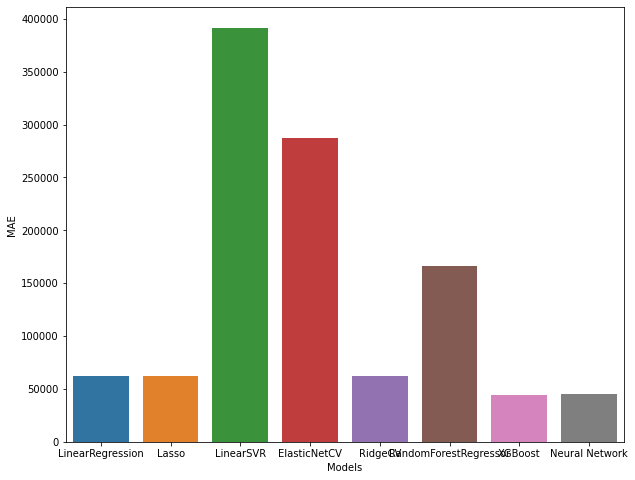

Model: LinearRegression, MAE: 62074.06165778232
Model: Lasso, MAE: 62073.547977862654
Model: LinearSVR, MAE: 391697.5244137599
Model: ElasticNetCV, MAE: 287230.45686582325
Model: RidgeCV, MAE: 62070.91302712417
Model: RandomForestRegressor, MAE: 166156.3207837878
Model: XGBoost, MAE: 43930.21273258803
Model: Neural Network, MAE: 44879.045429735095


Suitable Model XGBoost, its MAE: 43930.21273258803




In [ ]:
print("Mean Absolute Error")
error_key = "MAE"

x, y = [], []

for model in models_info.keys():
    x.append(model)
    y.append(models_info[model][error_key])

plt.figure(figsize=(10,8))
sns.barplot(x=x, y=y)

plt.xlabel('Models')
plt.ylabel(error_key)
plt.show()

best_model=None
best_model_value=None

for model in models_info.keys():
    print("Model: {}, {}: {}".format(model, error_key, models_info[model][error_key]))
    if not best_model or best_model_value > models_info[model][error_key]:
       best_model = model
       best_model_value = models_info[model][error_key]

print ("\n\nSuitable Model {}, its {}: {}\n\n".format(best_model, error_key, best_model_value))

**Mean Squared Error**

Mean Squared Error


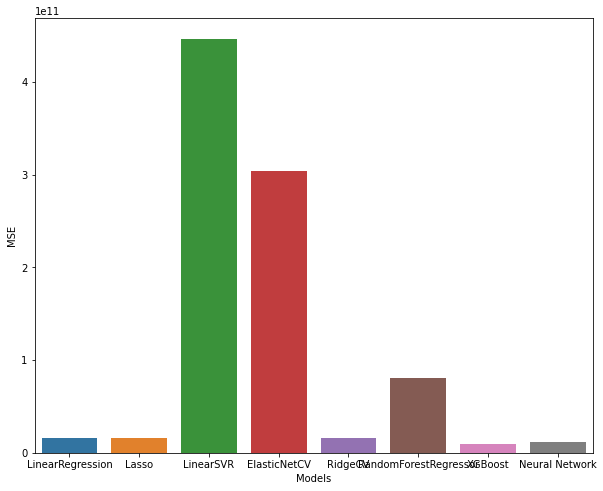

Model: LinearRegression, MSE: 15918035023.524109
Model: Lasso, MSE: 15918079844.844341
Model: LinearSVR, MSE: 446552317794.789
Model: ElasticNetCV, MSE: 303678563428.17584
Model: RidgeCV, MSE: 15918387353.484184
Model: RandomForestRegressor, MSE: 80307013751.31909
Model: XGBoost, MSE: 9759304325.082067
Model: Neural Network, MSE: 11743674633.085772


Suitable Model XGBoost, its MSE: 9759304325.082067




In [ ]:
print("Mean Squared Error")
error_key = "MSE"

x, y = [], []

for model in models_info.keys():
    x.append(model)
    y.append(models_info[model][error_key])

plt.figure(figsize=(10,8))
sns.barplot(x=x, y=y)

plt.xlabel('Models')
plt.ylabel(error_key)
plt.show()

best_model=None
best_model_value=None

for model in models_info.keys():
    print("Model: {}, {}: {}".format(model, error_key, models_info[model][error_key]))
    if not best_model or best_model_value > models_info[model][error_key]:
       best_model = model
       best_model_value = models_info[model][error_key]

print ("\n\nSuitable Model {}, its {}: {}\n\n".format(best_model, error_key, best_model_value))

**Root Mean Squar Error**

Root Mean Squar Error


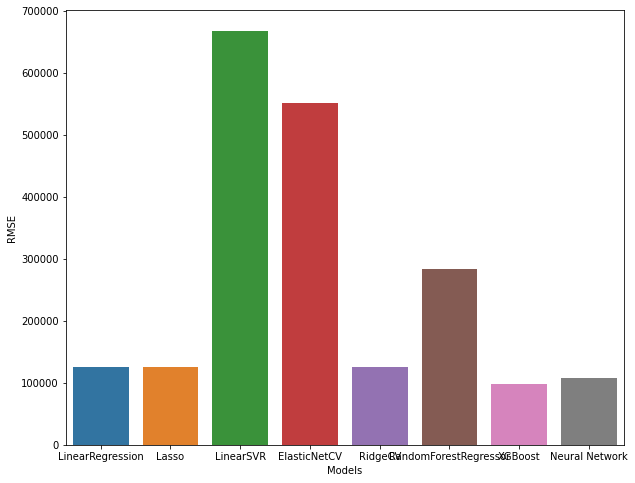

Model: LinearRegression, RMSE: 126166.69538164226
Model: Lasso, RMSE: 126166.87300890175
Model: LinearSVR, RMSE: 668245.7016657788
Model: ElasticNetCV, RMSE: 551070.3797412594
Model: RidgeCV, RMSE: 126168.09166141883
Model: RandomForestRegressor, RMSE: 283384.92153133184
Model: XGBoost, RMSE: 98789.19133732226
Model: Neural Network, RMSE: 108368.23627376137


Suitable Model XGBoost, its RMSE: 98789.19133732226




In [ ]:
print("Root Mean Squar Error")
error_key = "RMSE"

x, y = [], []

for model in models_info.keys():
    x.append(model)
    y.append(models_info[model][error_key])

plt.figure(figsize=(10,8))
sns.barplot(x=x, y=y)

plt.xlabel('Models')
plt.ylabel(error_key)
plt.show()

best_model=None
best_model_value=None

for model in models_info.keys():
    print("Model: {}, {}: {}".format(model, error_key, models_info[model][error_key]))
    if not best_model or best_model_value > models_info[model][error_key]:
       best_model = model
       best_model_value = models_info[model][error_key]

print ("\n\nSuitable Model {}, its {}: {}\n\n".format(best_model, error_key, best_model_value))

**R2 Scores**

R2 on training data
LinearRegression: 0.9532716361803213
Lasso: 0.9532716361354674
LinearSVR: -0.43886770275431286
ElasticNetCV: 0.0059412017407392
RidgeCV: 0.9532716230886248
RandomForestRegressor: 0.7111542916315077
XGBoost: 0.985110608716725
Neural Network: 0.9615493192105207
[Training Data] Model with good R2 value, Model:XGBoost - 0.985110608716725


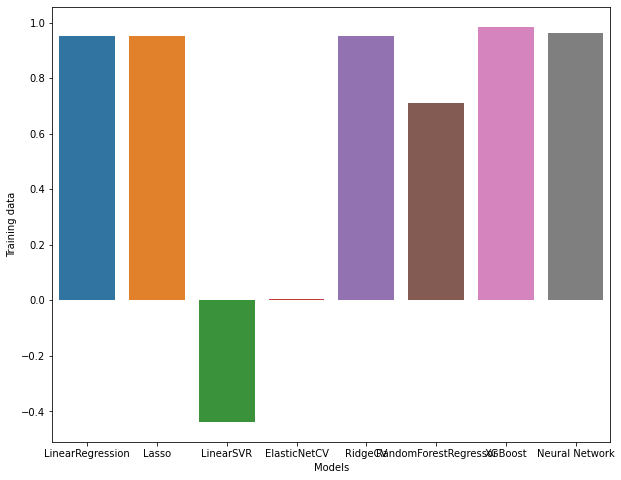

R2 on testing data
LinearRegression: 0.9478817914657729
Lasso: 0.9478816447135566
LinearSVR: -0.46208415711342976
ElasticNetCV: 0.005707508952307205
RidgeCV: 0.9478806378807793
RandomForestRegressor: 0.7370619122732853
XGBoost: 0.9680464669658073
Neural Network: 0.9647906067891295
[Testing Data] Model with good R2 value, Model:XGBoost - 0.9680464669658073


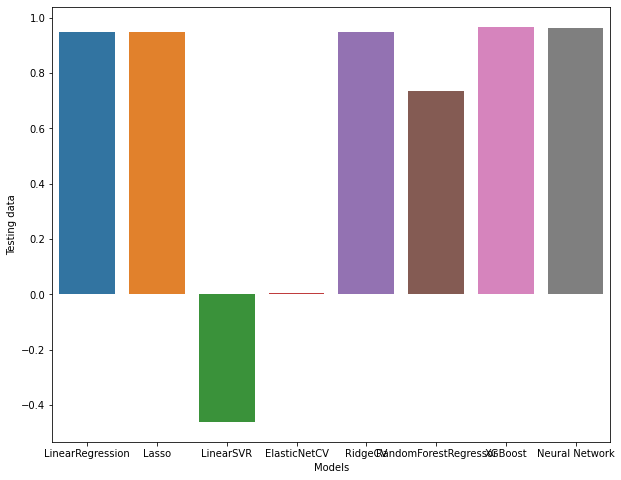

In [ ]:
print("R2 on training data")

x, y = [], []

best_tarin_r2_model = None
best_train_r2_value = None

for model in models_info.keys():
    x.append(model)
    y.append(models_info[model]["R2_TRAIN"])
    print("{}: {}".format(model, models_info[model]["R2_TRAIN"]))
    if not best_tarin_r2_model or best_train_r2_value < models_info[model]["R2_TRAIN"]:
       best_tarin_r2_model = model
       best_train_r2_value = models_info[model]["R2_TRAIN"]

print("[Training Data] Model with good R2 value, Model:{} - {}".format(best_tarin_r2_model, best_train_r2_value))
plt.figure(figsize=(10,8))
sns.barplot(x=x, y=y)

plt.xlabel('Models')
plt.ylabel("Training data")
plt.show()

print("R2 on testing data")

xx, yy = [], []
best_test_r2_model = None
best_test_r2_value = None
for model in models_info.keys():
    xx.append(model)
    yy.append(models_info[model]["R2_TEST"])
    print("{}: {}".format(model, models_info[model]["R2_TEST"]))
    if not best_test_r2_model or best_test_r2_value < models_info[model]["R2_TEST"]:
       best_test_r2_model = model
       best_test_r2_value = models_info[model]["R2_TEST"]

print("[Testing Data] Model with good R2 value, Model:{} - {}".format(best_test_r2_model, best_test_r2_value))

plt.figure(figsize=(10,8))
sns.barplot(x=xx, y=yy)

plt.xlabel('Models')
plt.ylabel("Testing data")
plt.show()
